<a href="https://colab.research.google.com/github/chasubeen/python_selfstudy/blob/master/%E1%84%92%E1%85%A9%E1%86%AB%E1%84%8C%E1%85%A1%20%E1%84%80%E1%85%A9%E1%86%BC%E1%84%87%E1%85%AE%E1%84%92%E1%85%A1%E1%84%82%E1%85%B3%E1%86%AB%20%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC%2B%E1%84%83%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC%20%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8/%208-3.%20%ED%95%A9%EC%84%B1%EA%B3%B1%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**가중치 시각화**
- 합성곱 층의 가중치를 이미지로 출력하는 것

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/혼자 공부하는 머신러닝+딥러닝 실습

/content/drive/MyDrive/Colab Notebooks/혼자 공부하는 머신러닝+딥러닝 실습


In [ ]:
# checkpoint 파일 읽어오기
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
# 추가한 층은 layers 속성에 파이썬 리스트 형태로 저장되어 있음
model.layers

In [ ]:
# 첫 번째 합성곱 층의 가중치와 절편의 크기 조사하기
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy() # 넘파이 배열로 변환하기
print(conv_weights.mean(),conv_weights.std()) # 평균과 표준편차 정하기

-0.010986257 0.2299233


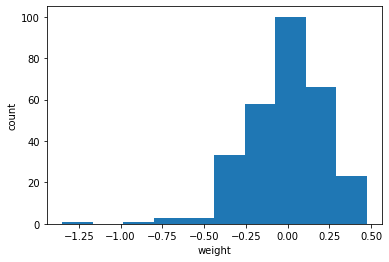

In [ ]:
# 가중치의 분포 시각화하기
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1)) # 히스토그램을 그리기 위해서는 1차원 배열로 전달해야 한다.
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

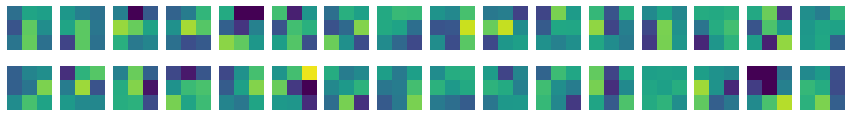

In [ ]:
# 커널 출력해보기
fig,axs = plt.subplots(2,16,figsize = (15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin = -0.5,vmax = 0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
# 훈련하지 않은 빈 합성곱 신경망 만들어보기
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size = 3,activation = 'relu',padding = 'same',input_shape = (28,28,1)))

In [ ]:
# 첫 번째 층의 가중치 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
# 가중치의 평균과 표준편차 확인하기
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

-0.011291537 0.08105409


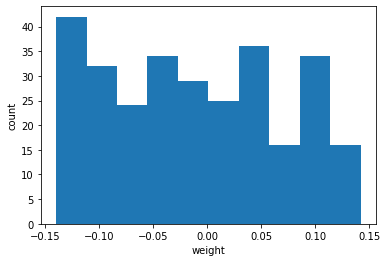

In [ ]:
# 가중치 배열을 히스토그램으로 표현하기
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

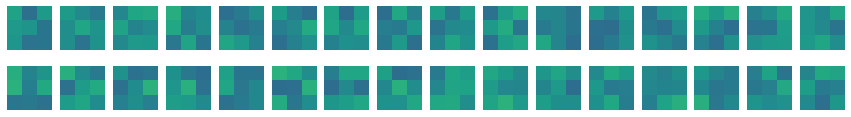

In [ ]:
# 가중치 값을 그림으로 출력하기
fig,axs = plt.subplots(2,16,figsize = (15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin = -0.5,vmax = 0.5)
    axs[i,j].axis('off')
plt.show()

# 전체적으로 가중치가 밋밋하게 초기화됨

###**함수형 API**
- 케라스에서 신경망 모델을 만드는 방법 중 하나
- Model 클래스에 모델의 입력과 출력을 지정
- 전형적으로 입력은 Input() 함수를 사용하여 정의하고, 출력은 마지막 층의 출력으로 정의함

In [ ]:
print(model.input) # 입력 모양

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
# model.input과 model.layers[0].output을 연결하는 새로운 모델 생성하기
conv_acti = keras.Model(model.input,model.layers[0].output)

###**특성 맵 시각화**
- 합성곱 층의 활성화 출력을 이미지로 그리는 것
- 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화시키는지 확인할 수 있음


4431872/4422102 [==============================] - 0s 0us/step


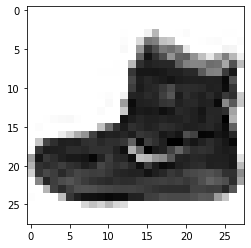

In [ ]:
# 훈련 세트에 있는 첫 번째 샘플 그려보기
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap = 'gray_r')
plt.show()

In [ ]:
# Con2D 층이 만드는 특성 맵을 출력해보기
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0 # predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것을 기대함 
feature_maps = conv_acti.predict(inputs) 

In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


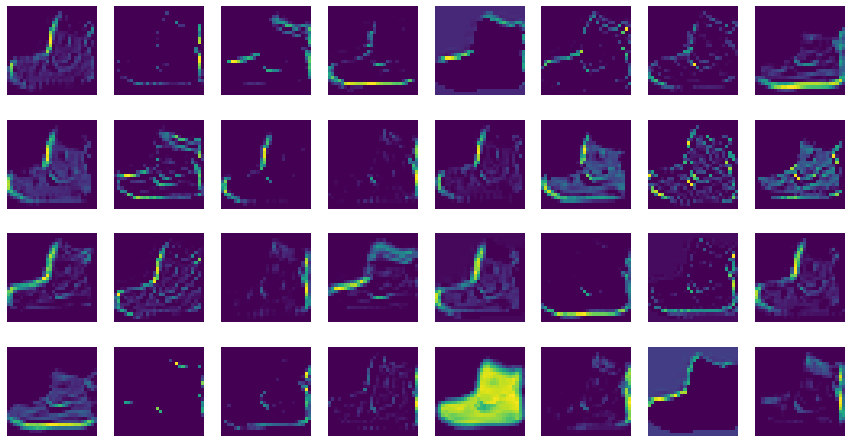

In [ ]:
# 특성 맵 그려보기
fig,axs = plt.subplots(4,8,figsize = (15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [ ]:
conv2_acti = keras.Model(model.input,model.layers[2].output)

In [ ]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


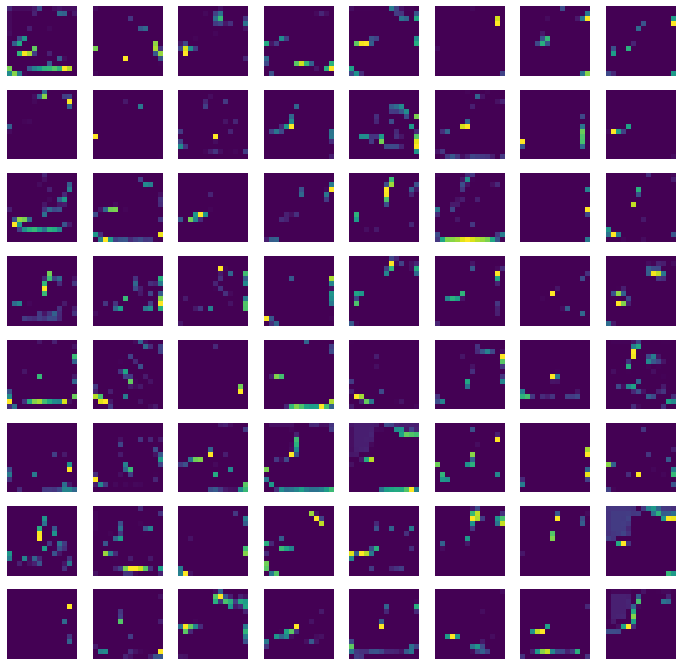

In [ ]:
fig,axs = plt.subplots(8,8,figsize = (12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i * 8 + j])
    axs[i,j].axis('off')
plt.show()